

###OBS I: Você pode alterar na 9ª célula as dimensões do filtro blur para verificar os efeitos do filtro. as dimensões devem ser iguais e impares, maiores ou iguais a 3.

###OBS II: As imagens devem estar no formato jpg.



# Bibliotecas e Importação de Imagens

In [36]:
import cv2 as cv  #Open CV usado para abertura de imagens.
import numpy as np # numpy para produção de matrizes.
import matplotlib.pyplot as plt #matplotlib para plotar imagens. 
import urllib.request as url  # urllib para fazer download de imagens em repositório do github.
import zipfile # zipfile para extração de arquivos zip.



# recebendo banco de dados de imagem.
url.urlretrieve('https://github.com/JWchester/Processamento-de-Imagem/blob/main/Imagens.zip?raw=true', 'Imagens.zip') 
with zipfile.ZipFile('Imagens.zip', 'r') as zip_ref:
    zip_ref.extractall('')

# Funções

In [37]:
# mostra na tela os pixels de uma imagem.

def image_pixels(img):
  
  for i in range(len(img)):
    print()

    for j in range(len(img[0])):
        print(f'{str(img[i][j]):^15}', end=' ')

    print()




# contorna o problema das bordas para realização da convolução(com função recursiva).

def edge_adjustment(repetition,filtro_conv,img):

  colums_zeros = np.zeros((len(img),1,3)) # vetor para adicionar 0's nas bordas da imagem (coluna de zeros).


  img_pt1 = np.insert(img, (0,len(img[0])), colums_zeros, axis=1) # comando insert para inserir a coluna de 0´s  no inicio e fim da coluna da imagem.


  rows_zeros = np.zeros((1,len(img_pt1[0]),3)) # vetor para adicionar 0's nas bordas da imagem (linha de zeros).


  img_df = np.insert(img_pt1, (0,len(img_pt1)),rows_zeros, axis=0) # imagem com as bordas com zeros preenchidas, após inserir as linhas de zeros.

  repetition+=1 # variavel auxiliar para contabilizar a quantidade de vezes que será necessário acrescentar zeros as bordas da imagem.



  if repetition == len(filtro_conv)//2: # len(filtro_conv)//2 solução matemática para determinar parada da recursividade.
    return img_df

  else:
    return edge_adjustment(repetition,filtro_conv,img_df)





def convolution_blur_filter(filtro_conv,img):

  sum_of_pixels = [] #vetor para somar os pixels concluindo a operação da convoluçao a seguir.

  filtered_pixels = [] # vetor de pixels que será armazenado.



  # operação da convolução sobre a imagem...

  for k in range(len(img)-(len(filtro_conv)//2)*2):
      for l in range(len(img[0])-(len(filtro_conv)//2)*2): 
        for i in range(len(filtro_conv)):
          for j in range(len(filtro_conv[0])):
            sum_of_pixels.append(img[i+k][j+l]*filtro_conv[i][j]) 

        h=[0,0,0] #vetor auxiliar que recebe cada pixel da imagem filtrada para ser inserida em filtered_pixels.

        # laço de repetição para somar os elementos das matriz sum_of_pixels concluindo a convolução.
        for i in range(len(sum_of_pixels)):
          h[0]= h[0] + sum_of_pixels[i][0]

          h[1]= h[1] + sum_of_pixels[i][1]

          h[2]= h[2] + sum_of_pixels[i][2]

        filtered_pixels.append(np.array(np.dot((1/((len(filtro_conv))**2)),h))) # filtered_pixels contem a imagem em formato de vetor.

        #obs: 1/((len(filtro_conv))**2 é a quantidade de pesos da matriz de convolução que varia com o tamanho do filtro convolucional. é um fator que deve ser multiplicado a matriz de convolução para obter o efeito blur.


        sum_of_pixels = [] # apaga os valores da sum_of_pixels para reiniciar o procedimento para a proxima posição da matriz de convolução sobre a imagem até concluir a convolução sobre toda a imagem.

  return filtered_pixels


  
  

# Filtro Convolucional (Aplicado)

Text(0.5, 1.0, 'imagem com dimensões 417 x 626')

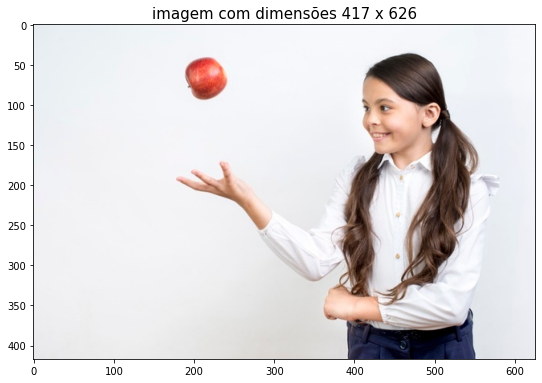

In [31]:
# Imagem original

img_teste = cv.cvtColor(cv.imread("imagens/apple.jpg"),cv.COLOR_BGR2RGB) # imagem.

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(9,9)) #aŕea de plot.

ax.imshow(img_teste) # plotando matriz "imagem".

ax.set_title("imagem com dimensões {} x {}".format(img_teste.shape[0], img_teste.shape[1]),size = 15) #legenda.

In [ ]:
# Mostra a posição dos pixels.


image_pixels(img_teste) # OBS: mostrar os pixels da imagem pode demorar um pouco dependendo das dimensões.

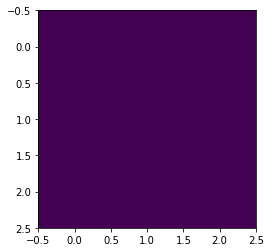

In [32]:
#criando filtro blur 

d = 3 # altere as dimensões do filtro para verificar os efeitos sobre a imagem. lembre-se que as dimnesões devem ser impares maiores ou iguais a 3).

filtro_conv = np.full((d,d),1) # filtro blur com as dimensões informadas pelo usuário.

plt.imshow(filtro_conv) #mostra filtro



In [33]:
#contornando problema das bordas.

r = 0 #variavel auxiliar que contabiliza a quantidade de vezes necessária para realizar o ajuste de bordas (por recursibvidade).

img_teste2 = edge_adjustment(r,filtro_conv,img_teste) #acrescentando as bordas a imagem.


In [ ]:
#mostra a posição dos pixels aṕos aplicação nas bordas.

image_pixels(img_teste2)# OBS: mostrar os pixels da imagem pode demorar um pouco dependendo das dimensões.


Text(0.5, 1.0, 'imagem com dimensões 419 x 628')

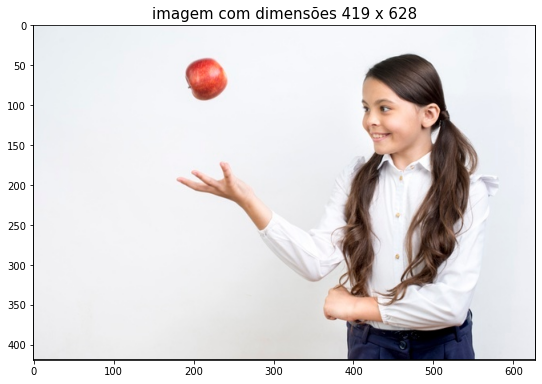

In [34]:
#Imagem pós aplicação das bordas.

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(9,9))

ax.imshow((img_teste2).astype(np.uint8))

ax.set_title("imagem com dimensões {} x {}".format(img_teste2.shape[0], img_teste2.shape[1]),size = 15)



In [35]:
filtered_image_vector = convolution_blur_filter(filtro_conv,img_teste2) #convolução com filtro blur.


filtered_image = np.zeros((len(img_teste),len(img_teste[0]),3)) #matriz de zeros que irá receber a imagem filtrada.



# o laço for  reconstroi a imagem filtrada a partir do seu formato vetorizado.

for i in range(len(filtered_image)):
  for j in range(len(filtered_image[0])):
    filtered_image[i][j] = filtered_image_vector[0]//1 #a conversão para inteiro é necessária, pois os pixels são necessariamente inteiros.
    
    del filtered_image_vector[0] # deleta sempre o primeiro elemento do vetor para receber o próximo valor.

# OBS: A convolução e reconntrução da imagem podem demorar um pouco dependendo da imagem.


Text(0.5, 1.0, 'imagem com dimensões 417 x 626')

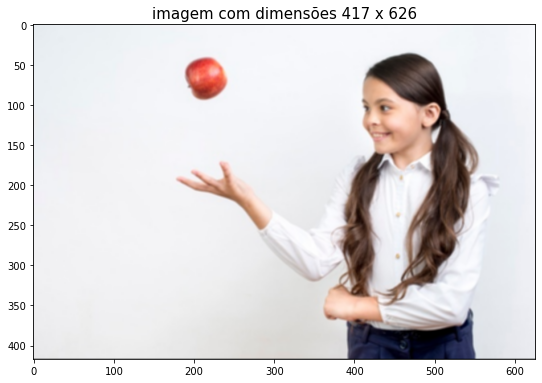

In [27]:
#Imagem após aplicação do filtro.

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(9,9))

ax.imshow((filtered_image).astype(np.uint8))

ax.set_title("imagem com dimensões {} x {}".format(filtered_image.shape[0], filtered_image.shape[1]),size = 15)